In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import preprocessing

from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network

## Загрузка данных

`в данном датасете уже считаны все характеристики звука`

In [2]:
voice = pd.read_csv(fr'C:\ML\DataBases\voice.csv')
voice

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [3]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

`преобразование текстовой информации в числовую`

In [4]:
le = preprocessing.LabelEncoder()  # данным энкодером можно пользоваться только в задачах классификации
voice['label'] = le.fit_transform(voice['label'])
voice

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


`нормализация данных`

In [5]:
voice[:] = preprocessing.MinMaxScaler().fit_transform(voice)
voice

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,...,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,...,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,1
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,...,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,1
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,...,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,1
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,...,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.436911,0.684871,0.570361,0.198513,0.686256,0.577704,0.046854,0.003489,0.921665,0.901057,...,0.436911,0.698762,0.380813,0.904450,0.279703,0.006452,0.192280,0.192418,0.173674,0
3164,0.362946,0.731172,0.262871,0.171937,0.702595,0.621185,0.015961,0.000333,0.912549,0.834545,...,0.362946,0.732760,0.126776,0.981526,0.305791,0.075269,0.167977,0.166667,0.298053,0
3165,0.484949,0.799042,0.690337,0.134329,0.786967,0.742124,0.050161,0.003469,0.855587,0.765849,...,0.484949,0.847759,0.153011,0.981526,0.164908,0.006452,0.134024,0.134120,0.208885,0
3166,0.492516,0.745692,0.695311,0.175136,0.767804,0.681107,0.041908,0.002539,0.870307,0.792241,...,0.492516,0.641561,0.127158,0.834600,0.265621,0.006452,0.164046,0.164163,0.333559,0


## Визуализация

`различия между мужскими и женскими показателями на каждом признаке`

In [6]:
voice.shape  # следовательно в датасете 20 признаков

(3168, 21)

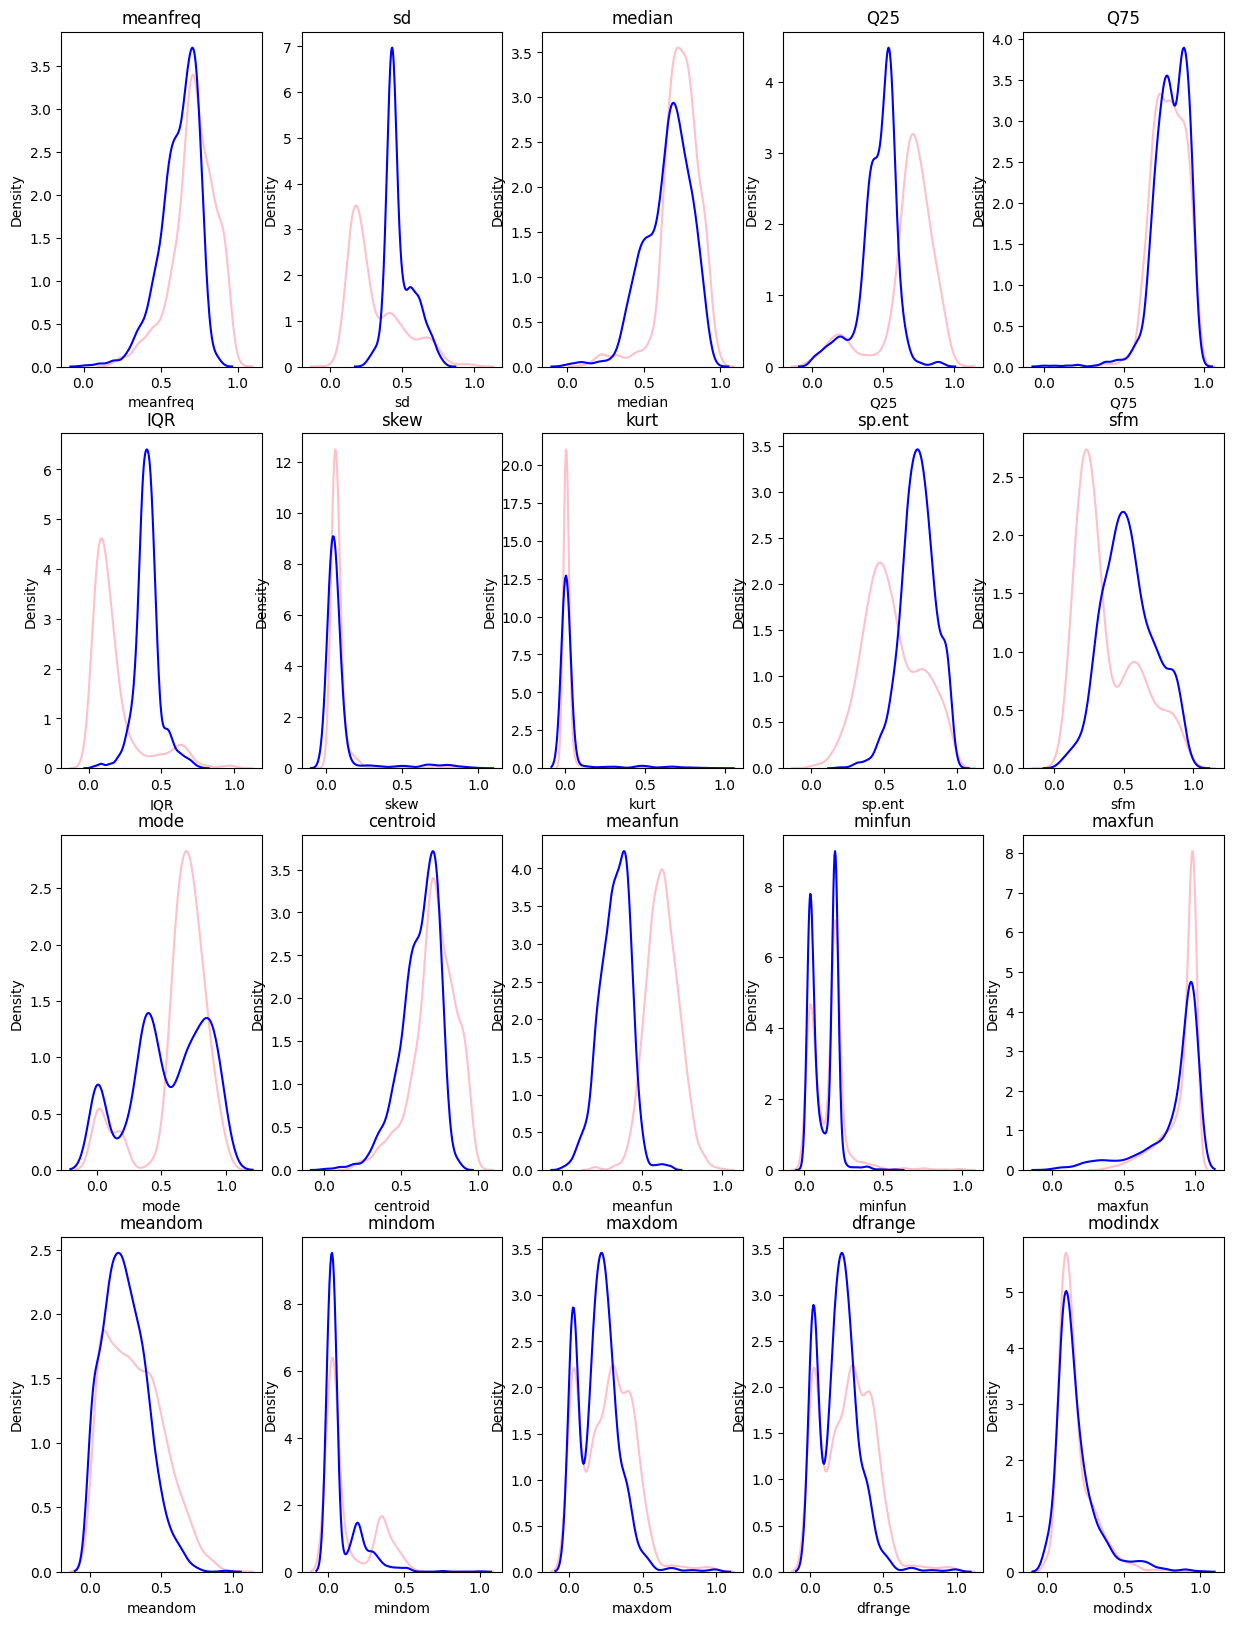

In [7]:
plt.subplots(4, 5, figsize=(15, 20))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.title(voice.columns[i])
    sns.kdeplot(voice.loc[voice['label'] == 0, voice.columns[i]], label='female', color='pink')
    sns.kdeplot(voice.loc[voice['label'] == 1, voice.columns[i]], label='male', color='blue')

## Разделение данных

In [8]:
train_all, test_all = train_test_split(voice, test_size=0.2, shuffle=True)

## Убираем лишние признаки

`те признаки, где различие между мужскими и женскими показателями наименьшие, можно убрать`

In [9]:
train = train_all[['sd', 'Q25', 'IQR', 'sp.ent', 'mode', 'maxfun', 'label']]
train

,sd,Q25,IQR,sp.ent,mode,maxfun,label
2543,0.124073,0.769739,0.067529,0.406941,0.780027,0.999749,0
2161,0.177016,0.705582,0.065606,0.461284,0.629382,0.812749,0
345,0.436244,0.418727,0.372416,0.723521,0.360544,0.361172,1
1542,0.435795,0.446883,0.397866,0.743081,0.395833,0.992409,1
2040,0.309124,0.664399,0.114556,0.649957,0.632933,0.981526,0
...,...,...,...,...,...,...,...
1693,0.734918,0.144892,0.657522,0.883892,0.699714,0.880415,0
1420,0.437439,0.560961,0.322601,0.774686,0.612705,0.999749,1
634,0.565862,0.420063,0.408994,0.875891,0.369427,0.610344,1
1812,0.255718,0.686362,0.111057,0.547943,0.634921,0.676791,0


In [10]:
test = test_all[['sd', 'Q25', 'IQR', 'sp.ent', 'mode', 'maxfun', 'label']]
test

,sd,Q25,IQR,sp.ent,mode,maxfun,label
1716,0.619179,0.493857,0.247748,0.754960,0.499654,0.904450,0
483,0.399891,0.561554,0.358730,0.608919,0.755873,0.351410,1
485,0.694762,0.245438,0.686802,0.839941,0.446579,0.981526,1
682,0.437333,0.397778,0.363911,0.604971,0.361702,0.623068,1
2215,0.366804,0.621026,0.118026,0.705841,0.688859,0.990585,0
...,...,...,...,...,...,...,...
1345,0.411623,0.541092,0.366381,0.718855,0.822115,0.981526,1
2788,0.226035,0.688578,0.101348,0.564356,0.623588,0.981526,0
1491,0.597937,0.391235,0.435362,0.813662,0.763382,0.981526,1
1694,0.613079,0.104699,0.492862,0.877526,0.043432,0.791561,0


In [11]:
x_train = train.iloc[:, :-1]
x_test = test.iloc[:, :-1]
y_train = train.iloc[:, -1]
y_test = test.iloc[:, -1]

## Функция рассчета метрик

In [12]:
def classify(model, x_train, y_train, x_test, y_test):
    target_names = ['female', 'male']
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

## KNeighborsClassifier

In [13]:
def knn_error(max_k, x_train, y_train, x_test, y_test):
    """поиск количества соседей для обучения"""
    losses = []
    for i in range(1, max_k+1):
        knn = neighbors.KNeighborsClassifier(n_neighbors=i).fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        loss = np.mean(y_test != y_pred)
        losses.append(loss)
    k = losses.index(min(losses)) + 1
    print(fr'Минимальные потери: {min(losses)} были достигнуты при k = {k}')

    plt.plot(range(1, max_k+1), losses, linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.title('Потери при разном количестве соседей')
    plt.xticks(range(1, max_k+1))
    plt.xlabel('K')
    plt.ylabel('losses')
    plt.show()

    return k

Минимальные потери: 0.04258675078864353 были достигнуты при k = 17


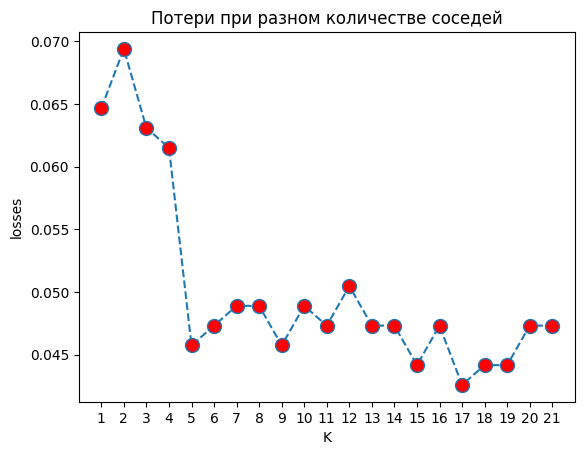

In [14]:
k = knn_error(21, x_train, y_train, x_test, y_test)

In [15]:
model = neighbors.KNeighborsClassifier(n_neighbors=k)
classify(model, x_train, y_train, x_test, y_test)

              precision    recall  f1-score   support

      female     0.9590    0.9560    0.9575       318
        male     0.9558    0.9589    0.9573       316

    accuracy                         0.9574       634
   macro avg     0.9574    0.9574    0.9574       634
weighted avg     0.9574    0.9574    0.9574       634



## GaussianNB

In [19]:
model = naive_bayes.GaussianNB()
classify(model, x_train, y_train, x_test, y_test)

              precision    recall  f1-score   support

      female     0.9435    0.8396    0.8885       318
        male     0.8547    0.9494    0.8996       316

    accuracy                         0.8943       634
   macro avg     0.8991    0.8945    0.8940       634
weighted avg     0.8992    0.8943    0.8940       634



## DecisionTreeClassifier

In [16]:
def find_nodes(max_n, x_train, y_train, x_test, y_test):
    """поиск оптимального количества ветвей"""
    losses = []
    for i in range(2, max_n+1):
        model = tree.DecisionTreeClassifier(max_leaf_nodes=i).fit(x_train, y_train)
        y_pred = model.predict(x_test)
        loss = np.mean(y_pred != y_test)
        losses.append(loss)
    n = losses.index(min(losses)) + 2
    print(fr'оптимальное количество ветвей с потерями: {min(losses)} равно {n}')

    plt.plot(range(2, max_n+1), losses, linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.title('Потери при разном количестве ветвей')
    plt.xticks(range(2, max_n+1))
    plt.xlabel('n')
    plt.ylabel('losses')
    plt.show()

    return n

оптимальное количество ветвей с потерями: 0.0694006309148265 равно 14


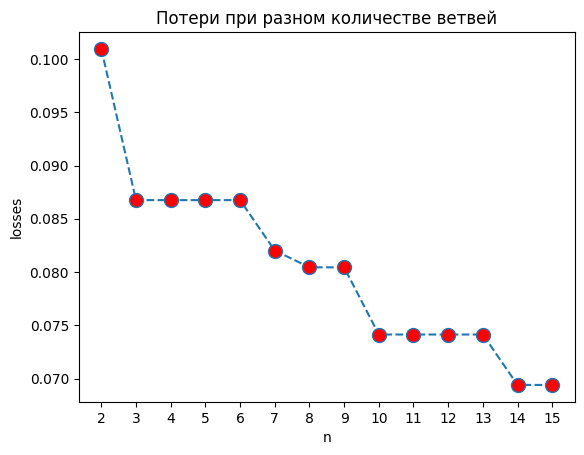

In [17]:
n = find_nodes(15, x_train, y_train, x_test, y_test)

In [18]:
tree = tree.DecisionTreeClassifier(max_leaf_nodes=n, criterion='gini')
classify(tree, x_train, y_train, x_test, y_test)

              precision    recall  f1-score   support

      female     0.9448    0.9151    0.9297       318
        male     0.9172    0.9462    0.9315       316

    accuracy                         0.9306       634
   macro avg     0.9310    0.9306    0.9306       634
weighted avg     0.9310    0.9306    0.9306       634



## Random Forest

In [34]:
def find_trees(max_n, x_train, y_train, x_test, y_test):
    losses = []
    for i in range(1, max_n, 10):
        model = ensemble.RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
        y_pred = model.predict(x_test)
        loss = np.mean(y_test != y_pred)
        losses.append(loss)
    n = losses.index(min(losses))
    print(fr'Наименьшие потери: {min(losses)} были достигнуты при {range(1, max_n, 10)[n]} деревьях')

    plt.plot(range(1, max_n+1, 10), losses, linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.xticks(range(1, max_n+1, 10))
    plt.xlabel('n')
    plt.ylabel('losses')
    plt.title('Потери при различном количестве деревьев')
    plt.show()

    return range(1, max_n, 10)[n]

Наименьшие потери: 0.03943217665615142 были достигнуты при 81 деревьях


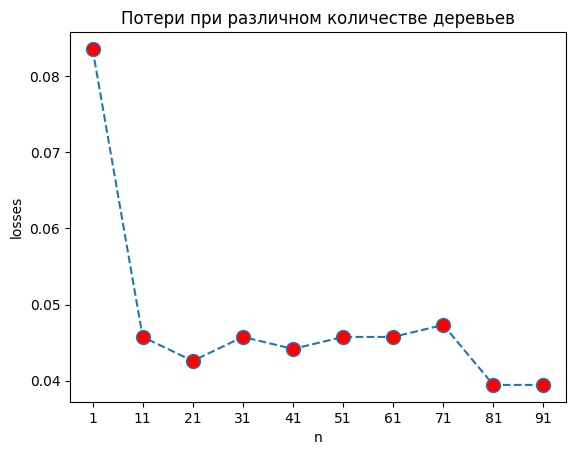

In [35]:
n = find_trees(100, x_train, y_train, x_test, y_test)

In [36]:
model = ensemble.RandomForestClassifier(n_estimators=n)
classify(model, x_train, y_train, x_test, y_test)

              precision    recall  f1-score   support

      female     0.9652    0.9591    0.9621       318
        male     0.9591    0.9652    0.9621       316

    accuracy                         0.9621       634
   macro avg     0.9622    0.9622    0.9621       634
weighted avg     0.9622    0.9621    0.9621       634



## SVM

In [43]:
def svm_kernel(x_train, y_train, x_test, y_test):
    accur = []
    kernel=['rbf','poly','linear']
    for i in kernel:
        model = svm.SVC(kernel=i).fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        print(fr'Точность предсказаний на ядре {i}: {acc}')
        accur.append(acc)
    n_acc = accur.index(max(accur))
    print(fr'Лучший вариант - ядро {kernel[n_acc]} с точностью {max(accur)}')

    return kernel[n_acc]

In [52]:
def svm_c(kernel, c_max, x_train, y_train, x_test, y_test):
    losses = []
    for i in range(1, c_max+1):
        model = svm.SVC(kernel=kernel, C=i).fit(x_train, y_train)
        y_pred = model.predict(x_test)
        loss = np.mean(y_pred != y_test)
        losses.append(loss)
    n_loss = losses.index(min(losses)) + 1
    print(fr'Наименьшие потери {min(losses)} были достигнуты при C = {n_loss}')

    plt.plot(range(1, c_max+1), losses, linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.xticks(range(1, c_max+1))
    plt.title('Потери при разном C')
    plt.xlabel('C')
    plt.ylabel('losses')
    plt.show()

    return n_loss

In [53]:
kernel = svm_kernel(x_train, y_train, x_test, y_test)

Точность предсказаний на ядре rbf: 0.9416403785488959
Точность предсказаний на ядре poly: 0.9511041009463722
Точность предсказаний на ядре linear: 0.9211356466876972
Лучший вариант - ядро poly с точностью 0.9511041009463722


Наименьшие потери 0.04416403785488959 были достигнуты при C = 5


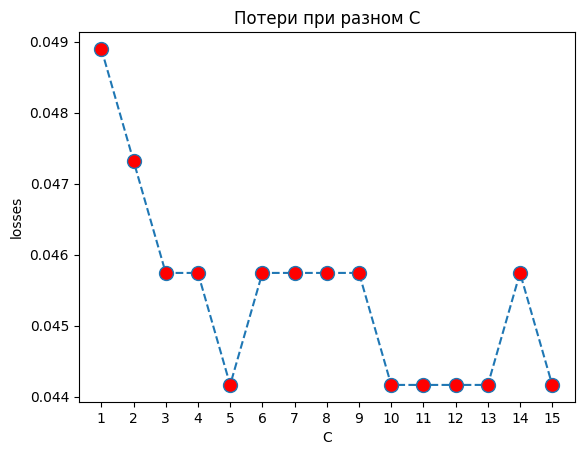

In [54]:
c = svm_c(kernel, 15, x_train, y_train, x_test, y_test)

In [55]:
model = svm.SVC(kernel=kernel, C=c)
classify(model, x_train, y_train, x_test, y_test)

              precision    recall  f1-score   support

      female     0.9708    0.9403    0.9553       318
        male     0.9417    0.9715    0.9564       316

    accuracy                         0.9558       634
   macro avg     0.9562    0.9559    0.9558       634
weighted avg     0.9563    0.9558    0.9558       634



## Neural_network

In [60]:
def nn_layers(n,x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=range(1,n+1)
    for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=i,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print(fr'Наименьшие потери {min(error_rate)} были достигнуты при {hidden_layer[kloc]} слоях')

    plt.plot(hidden_layer, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.xticks(hidden_layer)
    plt.title('Потери при различном количестве слоев нс')
    plt.xlabel('n')
    plt.ylabel('losses')
    plt.show()
    return hidden_layer[kloc]

Наименьшие потери 0.0583596214511041 были достигнуты при 10 слоях


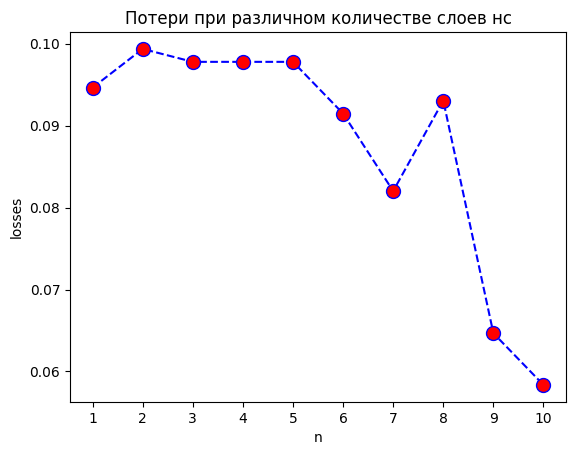

In [61]:
n = nn_layers(10, x_train, y_train, x_test, y_test)

In [62]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=n,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
classify(model, x_train, y_train, x_test, y_test)

              precision    recall  f1-score   support

      female     0.9763    0.9057    0.9396       318
        male     0.9115    0.9778    0.9435       316

    accuracy                         0.9416       634
   macro avg     0.9439    0.9418    0.9416       634
weighted avg     0.9440    0.9416    0.9416       634

